# AMPLab Module 2 project
#### Yuxi Qiao and Betty Cortiñas

### Research Question

In this project we aim at answering the following research questions: what sequences of three consecutive notes are the most frequent ocurring on the same syllable in Jingju vocal parts in terms of the nature of the two intervals that are formed, namely, interval class and direction? Are there differences between Erhuang and Xipi, or between Dan and Laosheng role types? 

In [1]:
from music21 import *
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# Path to the folder that contains the musicXML Jingju scores
datasetPath = 'Jingju Scores Dataset/MusicXML'

# Path to the .csv files with data about scores and lines
scoresDataFile = 'Jingju Scores Dataset/MuseScore/scores_data.csv'
linesDataFile = 'Jingju Scores Dataset/MuseScore/lines_data.csv'

### Analysis by Shengqiang and role type

In [2]:
# Read .csv files
scores_data = pd.read_csv(scoresDataFile)
scores_data.set_index("File name", inplace=True)
lines_data = pd.read_csv(linesDataFile)

Let's count all the intervals with 3 notes, excluding those with grace notes and unison intervals, and without rests in the middle.

In [3]:
allScores = os.listdir(datasetPath)  # All Jingju scores

# Dictionaries for each role type
intervals_dan = {}
intervals_laosheng = {}

sequence_intervals = {}

sequence_intervals_erhuang = {}
sequence_intervals_xipi = {}

sequence_intervals_erhuang_dan = {}
sequence_intervals_erhuang_laosheng = {}
sequence_intervals_xipi_dan = {}
sequence_intervals_xipi_laosheng = {}

# Iterate over the scores
for score in allScores:
    print('Parsing', score)
    s = converter.parse(os.path.join(datasetPath, score))
    
    # Find out which parts are vocal and which instrumental
    vocalParts = []  # Some scores have two vocal parts
    
    for p in s.parts:
        nn = p.flat.notesAndRests.stream() 
        if len(nn) > 0: # There are few scores with an empty part
            i = 0
            n = nn[i]
            # Sometimes the vocal part starts with grace notes,
            # but lyrics are only attached to main notes
            while n.quarterLength == 0:
                i += 1
                n = nn[i]
            if n.lyric:
                vocalParts.append(p)
      
    for pv in vocalParts:
        nvr = pv.flat.notesAndRests.stream() # All notes and rests from the vocal part
        
        # Find sequences of three consecutive notes 
        for x in nvr[:-2]:
            if (x.isNote and (not x.duration.isGrace)):
                
                if (x.next().isNote and (not x.next().duration.isGrace)):
                    itv1 = interval.Interval(x, x.next())
                    
                    if (x.next().next().isNote and (not x.next().next().duration.isGrace)):
                        itv2 = interval.Interval(x.next(), x.next().next())
                    elif (x.next().next().isNote and x.next().next().duration.isGrace):
                        if (x.next().next().next().isNote and (not x.next().next().next().duration.isGrace)):
                            itv2 = interval.Interval(x.next(), x.next().next().next())
                        else:
                            continue
                    else:
                        continue
                elif (x.next().isNote and x.next().duration.isGrace):
                    if (x.next().next().isNote and (not x.next().next().duration.isGrace)):
                        itv1 = interval.Interval(x, x.next().next())
                        try:
                            if (x.next().next().next().isNote and (not x.next().next().next().duration.isGrace)):
                                itv2 = interval.Interval(x.next().next(), x.next().next().next())
                            elif (x.next().next().next().isNote and x.next().next().next().duration.isGrace):
                                if (x.next().next().next().next().isNote and (not x.next().next().next().next().duration.isGrace)):
                                    itv2 = interval.Interval(x.next().next(), x.next().next().next().next())
                                else:
                                    continue
                        except:
                            continue
                    else:
                        continue
                else:
                    continue
                
                line = lines_data.loc[lines_data['File name'] == score] # Retrieve the lines of the score
                for index, row in line.iterrows():
                    if float(row["Start"]) <= x.offset <= float(row["End"]): # Find the particular line for these notes
                        role_type = row["Role type"] # And retrieve the role type
                        break
                
                if itv1.name != "P1" and itv2.name != "P1": # Exclude unison intervals
                    # Name for the sequence of intervals, appending A or D before the class depending 
                    # on the ascending or descending direction of the interval, respectively.
                    seq_itv_name = str(itv1.direction.name[0]) + str(itv1.name) + "_" + str(itv2.direction.name[0]) + str(itv2.name)
                    sequence_intervals[seq_itv_name] = sequence_intervals.get(seq_itv_name, 0) + 1
                    if scores_data.loc[score.split('.')[0]]["Shengqiang"] == "erhuang":
                        sequence_intervals_erhuang[seq_itv_name] = sequence_intervals_erhuang.get(seq_itv_name, 0) + 1
                        if role_type == "dan":
                            sequence_intervals_erhuang_dan[seq_itv_name] = sequence_intervals_erhuang_dan.get(seq_itv_name, 0) + 1 
                        elif role_type == "laosheng":
                            sequence_intervals_erhuang_laosheng[seq_itv_name] = sequence_intervals_erhuang_laosheng.get(seq_itv_name, 0) + 1 
                    elif scores_data.loc[score.split('.')[0]]["Shengqiang"] == "xipi":
                        sequence_intervals_xipi[seq_itv_name] = sequence_intervals_xipi.get(seq_itv_name, 0) + 1
                        if role_type == "dan":
                            sequence_intervals_xipi_dan[seq_itv_name] = sequence_intervals_xipi_dan.get(seq_itv_name, 0) + 1 
                        elif role_type == "laosheng":
                            sequence_intervals_xipi_laosheng[seq_itv_name] = sequence_intervals_xipi_laosheng.get(seq_itv_name, 0) + 1  

Parsing daeh-CanQiQi-WuLongZuo.xml
Parsing daeh-LiYanFei-DaBaoGuo.xml
Parsing daeh-LiYanFei-ErJinGong.xml
Parsing daeh-NaRiFeng-YuanXiaoMi.xml
Parsing daeh-NuZiYou-TouJunBieYao.xml
Parsing daeh-SunShangXiang-BieHuangGong.xml
Parsing daeh-TanHongYan-HuoXiaoYu.xml
Parsing daeh-WangChunE-SanNiangJiaoZi.xml
Parsing daeh-WeiKaiYan-DouEYuan.musicxml
Parsing daeh-WuDuanQiao-BiYuZan.xml
Parsing daeh-XiaoNuCai-SanNiangJiaoZi.xml
Parsing daeh-YangYuHuan-TaiZheWaiZhuan.musicxml
Parsing daeh-YiShaShi-SuoLingNang.musicxml
Parsing daeh-ZaoBuXing-HeHouMaDian.xml
Parsing daeh-ZiNaRi-ErJinGong.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-1.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-2.xml
Parsing daeh-ZuoChunGui-XiShi.xml
Parsing daeh-ZuoRiGong-TaiZhenWaiChuan.xml
Parsing danbz-BeiJiuChan-ChunGuiMeng.musicxml
Parsing danbz-KanDaWang-BaWangBieJi.musicxml
Parsing daspd-DuShouKong-WangJiangTing.musicxml
Parsing daspd-HaiDaoBing-GuiFeiZuiJiu.musicxml
Parsing daxp-ChenSanLiang-ChenSanLiangPaTang.xml
Parsing daxp-ChunQiu

In [4]:
sorted_sequence_values = sorted(sequence_intervals.values(), reverse=True)
sorted_sequence_intervals = {}

for i in sorted_sequence_values:
    for k in sequence_intervals.keys():
        if sequence_intervals[k] == i:
            sorted_sequence_intervals[k] = sequence_intervals[k]

sorted_sequence_values_erhuang = sorted(sequence_intervals_erhuang.values(), reverse=True)
sorted_sequence_values_xipi = sorted(sequence_intervals_xipi.values(), reverse=True)

sorted_sequence_intervals_erhuang = {}
sorted_sequence_intervals_xipi = {}

for i in sorted_sequence_values_erhuang:
    for k in sequence_intervals_erhuang.keys():
        if sequence_intervals_erhuang[k] == i:
            sorted_sequence_intervals_erhuang[k] = sequence_intervals_erhuang[k]
            if k in sequence_intervals_xipi:
                sorted_sequence_intervals_xipi[k] = sequence_intervals_xipi[k]
            else:
                sorted_sequence_intervals_xipi[k] = 0

for k in sequence_intervals_xipi.keys():
    if not k in sorted_sequence_intervals_erhuang:
        sorted_sequence_intervals_erhuang[k] = 0
        sorted_sequence_intervals_xipi[k] = sequence_intervals_xipi[k]

print("Number of intervals (Erhuang dan): ", len(sorted_sequence_intervals_erhuang))
print("Number of intervals (Erhuang xipi): ", len(sorted_sequence_intervals_xipi))

Number of intervals (Erhuang dan):  99
Number of intervals (Erhuang xipi):  99


In [4]:
sorted_sequence_values_erhuang_dan = sorted(sequence_intervals_erhuang_dan.values(), reverse=True)
sorted_sequence_values_erhuang_laosheng = sorted(sequence_intervals_erhuang_laosheng.values(), reverse=True)
sorted_sequence_values_xipi_dan = sorted(sequence_intervals_xipi_dan.values(), reverse=True)
sorted_sequence_values_xipi_laosheng = sorted(sequence_intervals_xipi_laosheng.values(), reverse=True)

sorted_sequence_intervals_erhuang_dan = {}
sorted_sequence_intervals_erhuang_laosheng = {}
sorted_sequence_intervals_xipi_dan = {}
sorted_sequence_intervals_xipi_laosheng = {}

for i in sorted_sequence_values_erhuang_dan:
    for k in sequence_intervals_erhuang_dan.keys():
        if sequence_intervals_erhuang_dan[k] == i:
            sorted_sequence_intervals_erhuang_dan[k] = sequence_intervals_erhuang_dan[k]
            if k in sequence_intervals_erhuang_laosheng:
                sorted_sequence_intervals_erhuang_laosheng[k] = sequence_intervals_erhuang_laosheng[k]
            else:
                sorted_sequence_intervals_erhuang_laosheng[k] = 0
            if k in sequence_intervals_xipi_dan:
                sorted_sequence_intervals_xipi_dan[k] = sequence_intervals_xipi_dan[k]
            else:
                sorted_sequence_intervals_xipi_dan[k] = 0
            if k in sequence_intervals_xipi_laosheng:
                sorted_sequence_intervals_xipi_laosheng[k] = sequence_intervals_xipi_laosheng[k]
            else:
                sorted_sequence_intervals_xipi_laosheng[k] = 0
                
for k in sequence_intervals_erhuang_laosheng.keys():
    if not k in sorted_sequence_intervals_erhuang_dan:
        sorted_sequence_intervals_erhuang_dan[k] = 0
        sorted_sequence_intervals_erhuang_laosheng[k] = sequence_intervals_erhuang_laosheng[k]
        if not k in sorted_sequence_intervals_xipi_dan:
            sorted_sequence_intervals_xipi_dan[k] = 0
        else:
            sorted_sequence_intervals_xipi_dan[k] = sequence_intervals_xipi_dan[k]
        if not k in sorted_sequence_intervals_xipi_laosheng:
            sorted_sequence_intervals_xipi_laosheng[k] = 0
        else:
            sorted_sequence_intervals_xipi_laosheng[k] = sequence_intervals_xipi_laosheng[k]
        
for k in sequence_intervals_xipi_dan.keys():
    if not k in sorted_sequence_intervals_erhuang_dan:
        sorted_sequence_intervals_erhuang_dan[k] = 0
        sorted_sequence_intervals_xipi_dan[k] = sequence_intervals_xipi_dan[k]
        if not k in sorted_sequence_intervals_erhuang_laosheng:
            sorted_sequence_intervals_erhuang_laosheng[k] = 0
        else:
            sorted_sequence_intervals_erhuang_laosheng[k] = sequence_intervals_erhuang_laosheng[k]
        if not k in sorted_sequence_intervals_xipi_laosheng:
            sorted_sequence_intervals_xipi_laosheng[k] = 0
        else:
            sorted_sequence_intervals_xipi_laosheng[k] = sequence_intervals_xipi_laosheng[k]

for k in sequence_intervals_xipi_laosheng.keys():
    if not k in sorted_sequence_intervals_erhuang_dan:
        sorted_sequence_intervals_erhuang_dan[k] = 0
        sorted_sequence_intervals_xipi_laosheng[k] = sequence_intervals_xipi_laosheng[k]
        if not k in sorted_sequence_intervals_erhuang_laosheng:
            sorted_sequence_intervals_erhuang_laosheng[k] = 0
        else:
            sorted_sequence_intervals_erhuang_laosheng[k] = sequence_intervals_erhuang_laosheng[k]
        if not k in sorted_sequence_intervals_xipi_dan:
            sorted_sequence_intervals_xipi_dan[k] = 0
        else:
            sorted_sequence_intervals_xipi_dan[k] = sequence_intervals_xipi_dan[k]

print("Number of intervals (Erhuang dan): ", len(sorted_sequence_intervals_erhuang_dan))
print("Number of intervals (Erhuang xipi): ", len(sorted_sequence_intervals_erhuang_laosheng))
print("Number of interval sequences (Xipi Dan): ", len(sorted_sequence_intervals_xipi_dan))
print("Number of interval sequences (Xipi Laosheng): ", len(sorted_sequence_intervals_xipi_laosheng))

Number of intervals (Erhuang dan):  99
Number of intervals (Erhuang xipi):  99
Number of interval sequences (Xipi Dan):  99
Number of interval sequences (Xipi Laosheng):  99


In [5]:
total_sequence = sum(sequence_intervals.values())
for k in sorted_sequence_intervals.keys():
    sorted_sequence_intervals[k] = (float(sorted_sequence_intervals[k])/float(total_sequence))*100
    

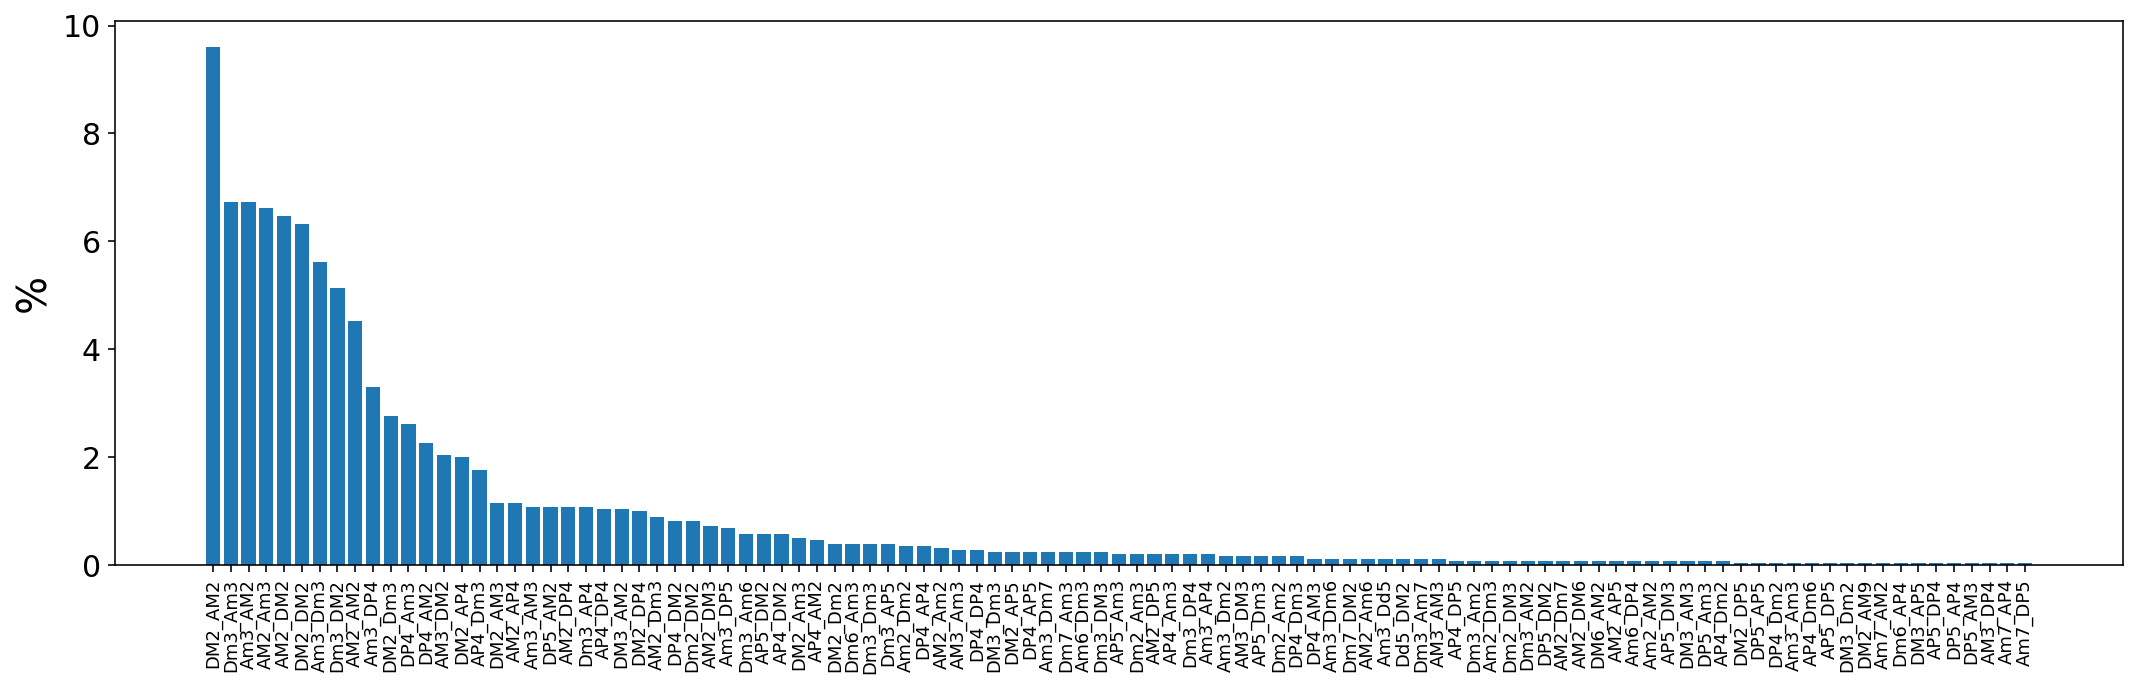

In [12]:
xTicks = sorted_sequence_intervals.keys()
yValues = sorted_sequence_intervals.values()

plt.figure(figsize=(18,5))
plt.bar(list(xTicks), list(yValues))
plt.xticks(list(xTicks), rotation='vertical', fontsize=9)
plt.yticks(fontsize=15)
plt.ylabel("%", fontsize=20)
plt.show()

In [5]:
total_sequence_erhuang = sum(sequence_intervals_erhuang.values())
total_sequence_xipi = sum(sequence_intervals_xipi.values())
for k in sorted_sequence_intervals_erhuang.keys():
    sorted_sequence_intervals_erhuang[k] = (float(sorted_sequence_intervals_erhuang[k])/float(total_sequence_erhuang))*100
    sorted_sequence_intervals_xipi[k] = (float(sorted_sequence_intervals_xipi[k])/float(total_sequence_xipi))*100

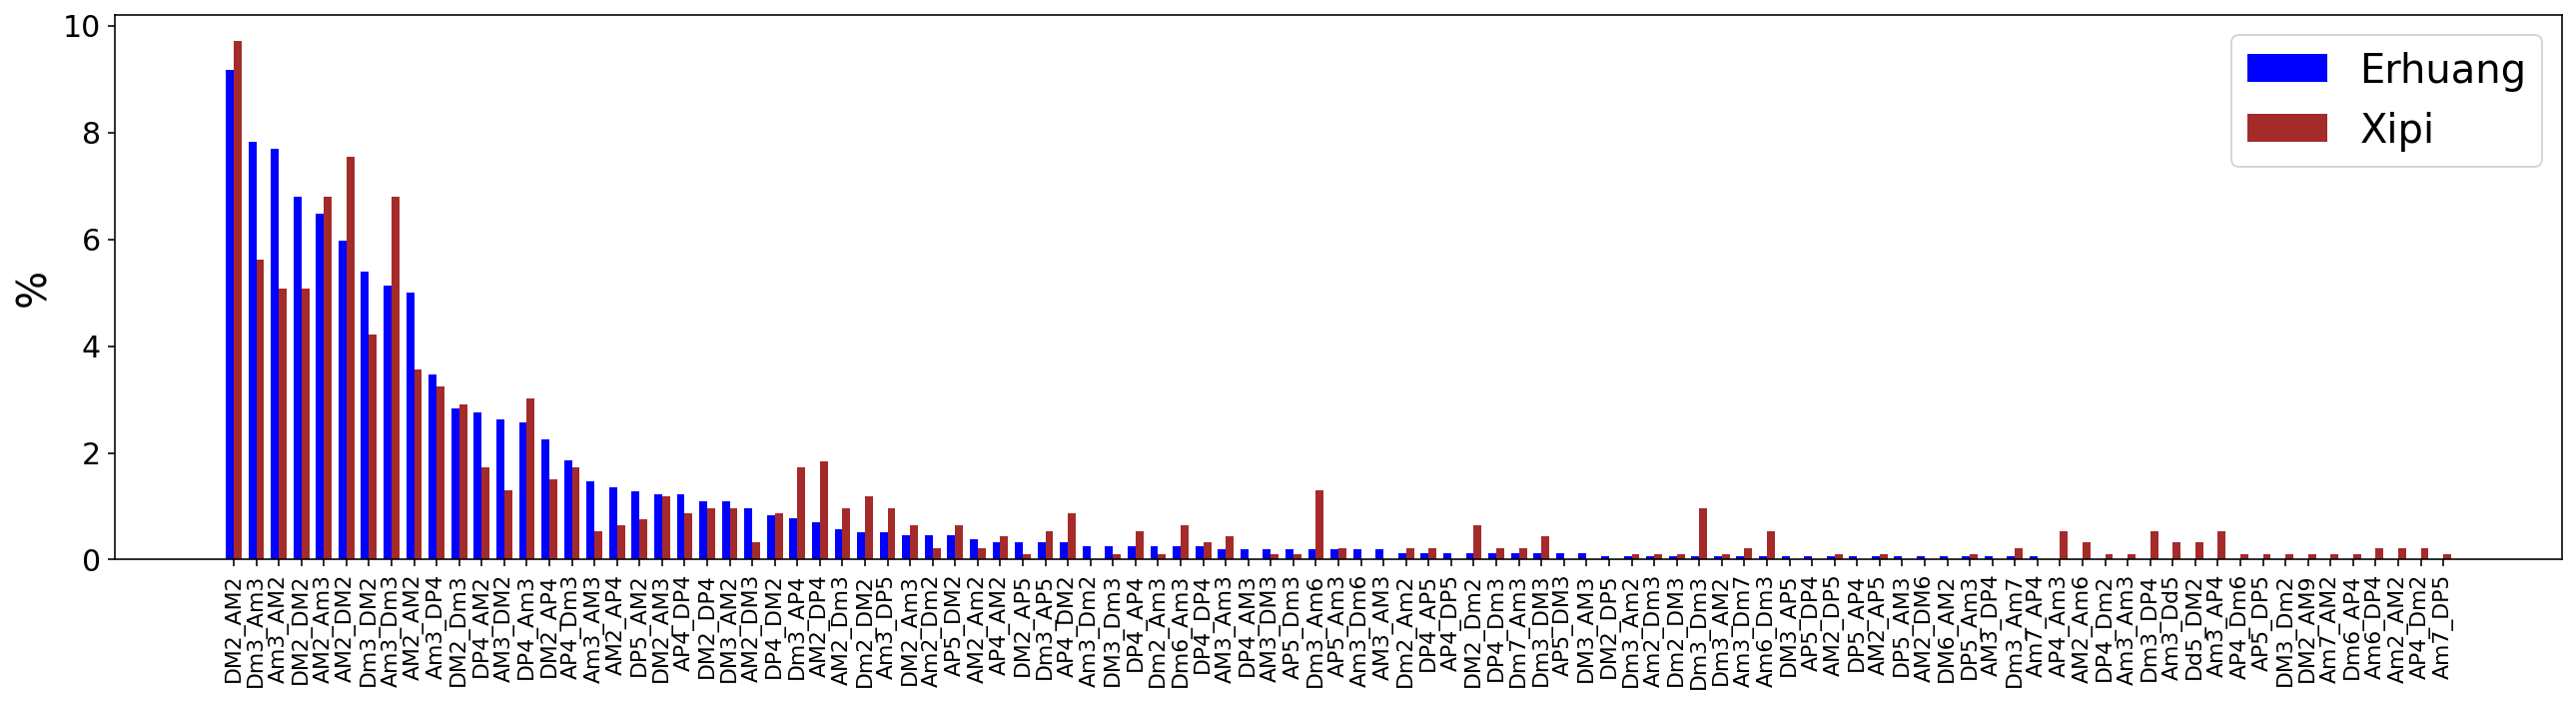

In [7]:
xTicks_erhuang = sorted_sequence_intervals_erhuang.keys()
yValues_erhuang = sorted_sequence_intervals_erhuang.values()
xTicks_xipi = sorted_sequence_intervals_xipi.keys()
yValues_xipi = sorted_sequence_intervals_xipi.values()

x = np.arange(len(xTicks_erhuang))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, yValues_erhuang, width, label='Erhuang', color="blue")
rects2 = ax.bar(x + width/2, yValues_xipi, width, label='Xipi', color="brown")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%', fontsize=20)
ax.set_title('')
ax.set_xticks(x, xTicks_erhuang, rotation='vertical', fontsize=11)
plt.yticks(fontsize=15)
ax.legend(fontsize=20)

fig.tight_layout()

plt.show()

Convert values into probabilities.

In [5]:
total_sequence_erhuang_dan = sum(sequence_intervals_erhuang_dan.values())
total_sequence_erhuang_laosheng = sum(sequence_intervals_erhuang_laosheng.values())
total_sequence_xipi_dan = sum(sequence_intervals_xipi_dan.values())
total_sequence_xipi_laosheng = sum(sequence_intervals_xipi_laosheng.values())
for k in sorted_sequence_intervals_erhuang_dan.keys():
    sorted_sequence_intervals_erhuang_dan[k] = (float(sorted_sequence_intervals_erhuang_dan[k])/float(total_sequence_erhuang_dan))*100
    sorted_sequence_intervals_erhuang_laosheng[k] = (float(sorted_sequence_intervals_erhuang_laosheng[k])/float(total_sequence_erhuang_laosheng))*100
    sorted_sequence_intervals_xipi_dan[k] = (float(sorted_sequence_intervals_xipi_dan[k])/float(total_sequence_xipi_dan))*100
    sorted_sequence_intervals_xipi_laosheng[k] = (float(sorted_sequence_intervals_xipi_laosheng[k])/float(total_sequence_xipi_laosheng))*100

Plot double bar graphs.

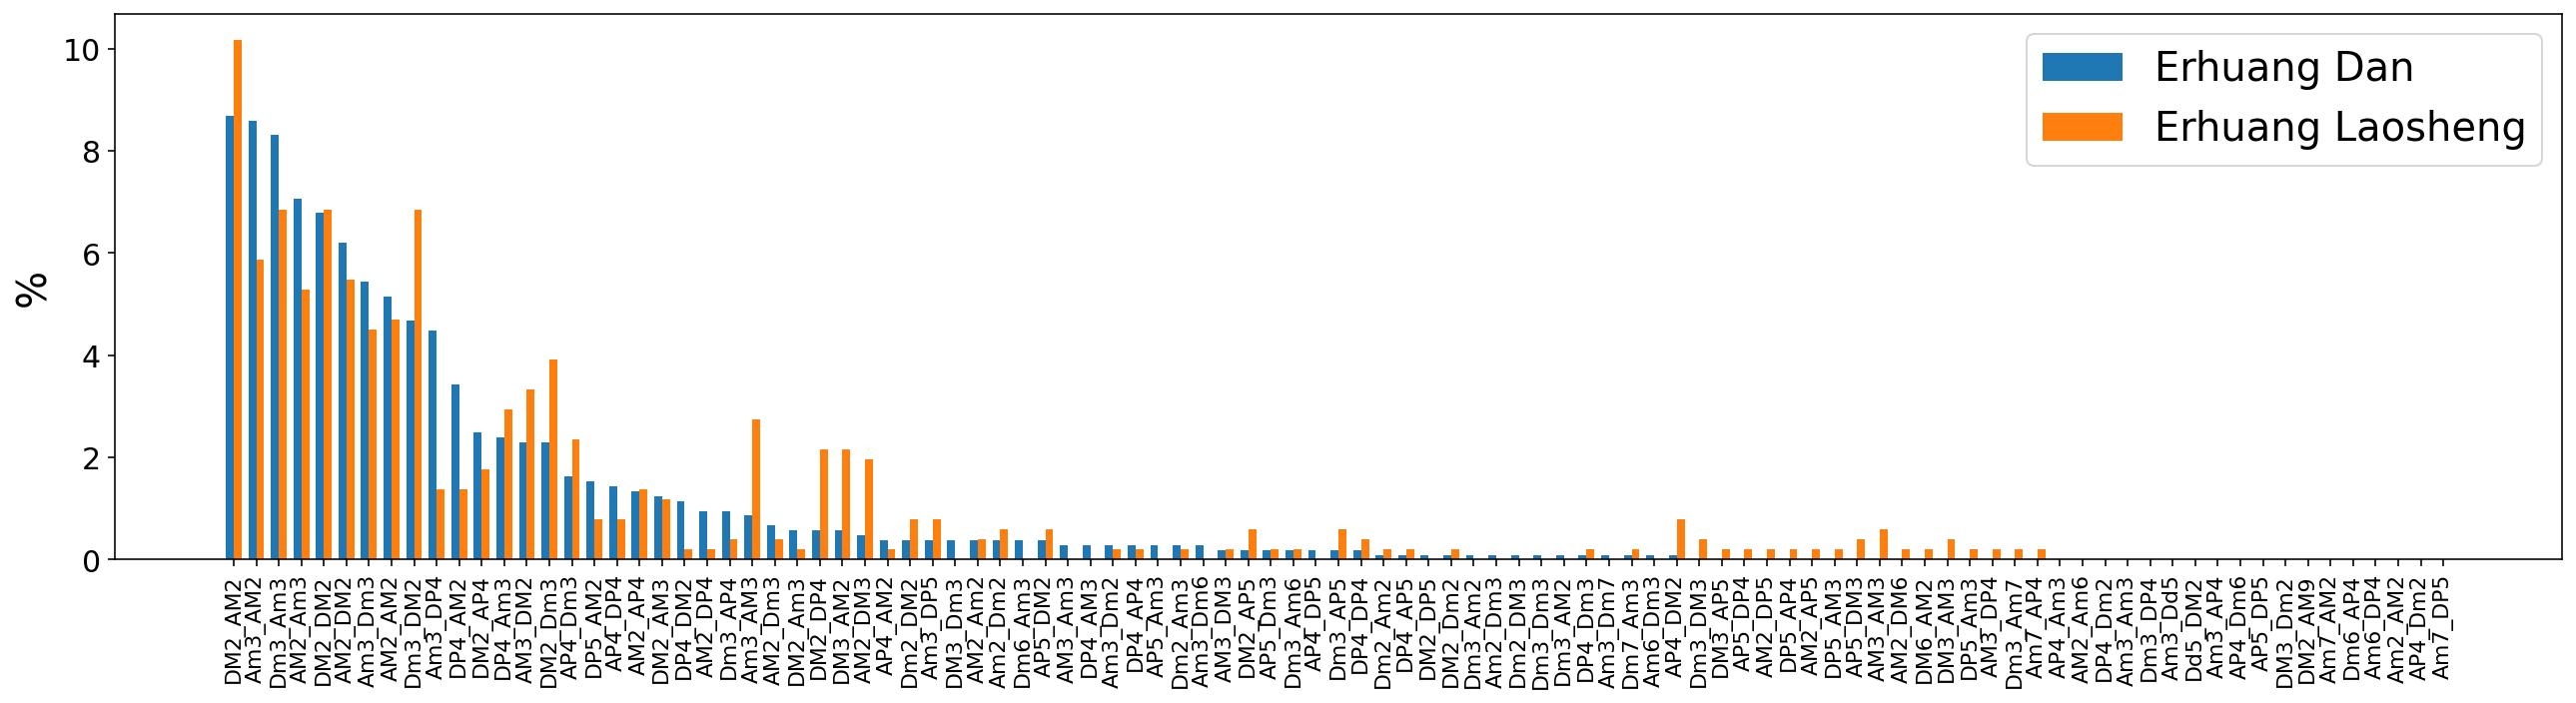

In [16]:
xTicks_erhuang_dan = sorted_sequence_intervals_erhuang_dan.keys()
yValues_erhuang_dan = sorted_sequence_intervals_erhuang_dan.values()
xTicks_erhuang_laosheng = sorted_sequence_intervals_erhuang_laosheng.keys()
yValues_erhuang_laosheng = sorted_sequence_intervals_erhuang_laosheng.values()
xTicks_xipi_dan = sorted_sequence_intervals_xipi_dan.keys()
yValues_xipi_dan = sorted_sequence_intervals_xipi_dan.values()
xTicks_xipi_laosheng = sorted_sequence_intervals_xipi_laosheng.keys()
yValues_xipi_laosheng = sorted_sequence_intervals_xipi_laosheng.values()

x = np.arange(len(xTicks_erhuang_dan))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, yValues_erhuang_dan, width, label='Erhuang Dan')
rects2 = ax.bar(x + width/2, yValues_erhuang_laosheng, width, label='Erhuang Laosheng')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%', fontsize=20)
ax.set_title('')
ax.set_xticks(x, xTicks_erhuang_dan, rotation='vertical', fontsize=11)
plt.yticks(fontsize=15)
ax.legend(fontsize=20)

fig.tight_layout()

plt.show()

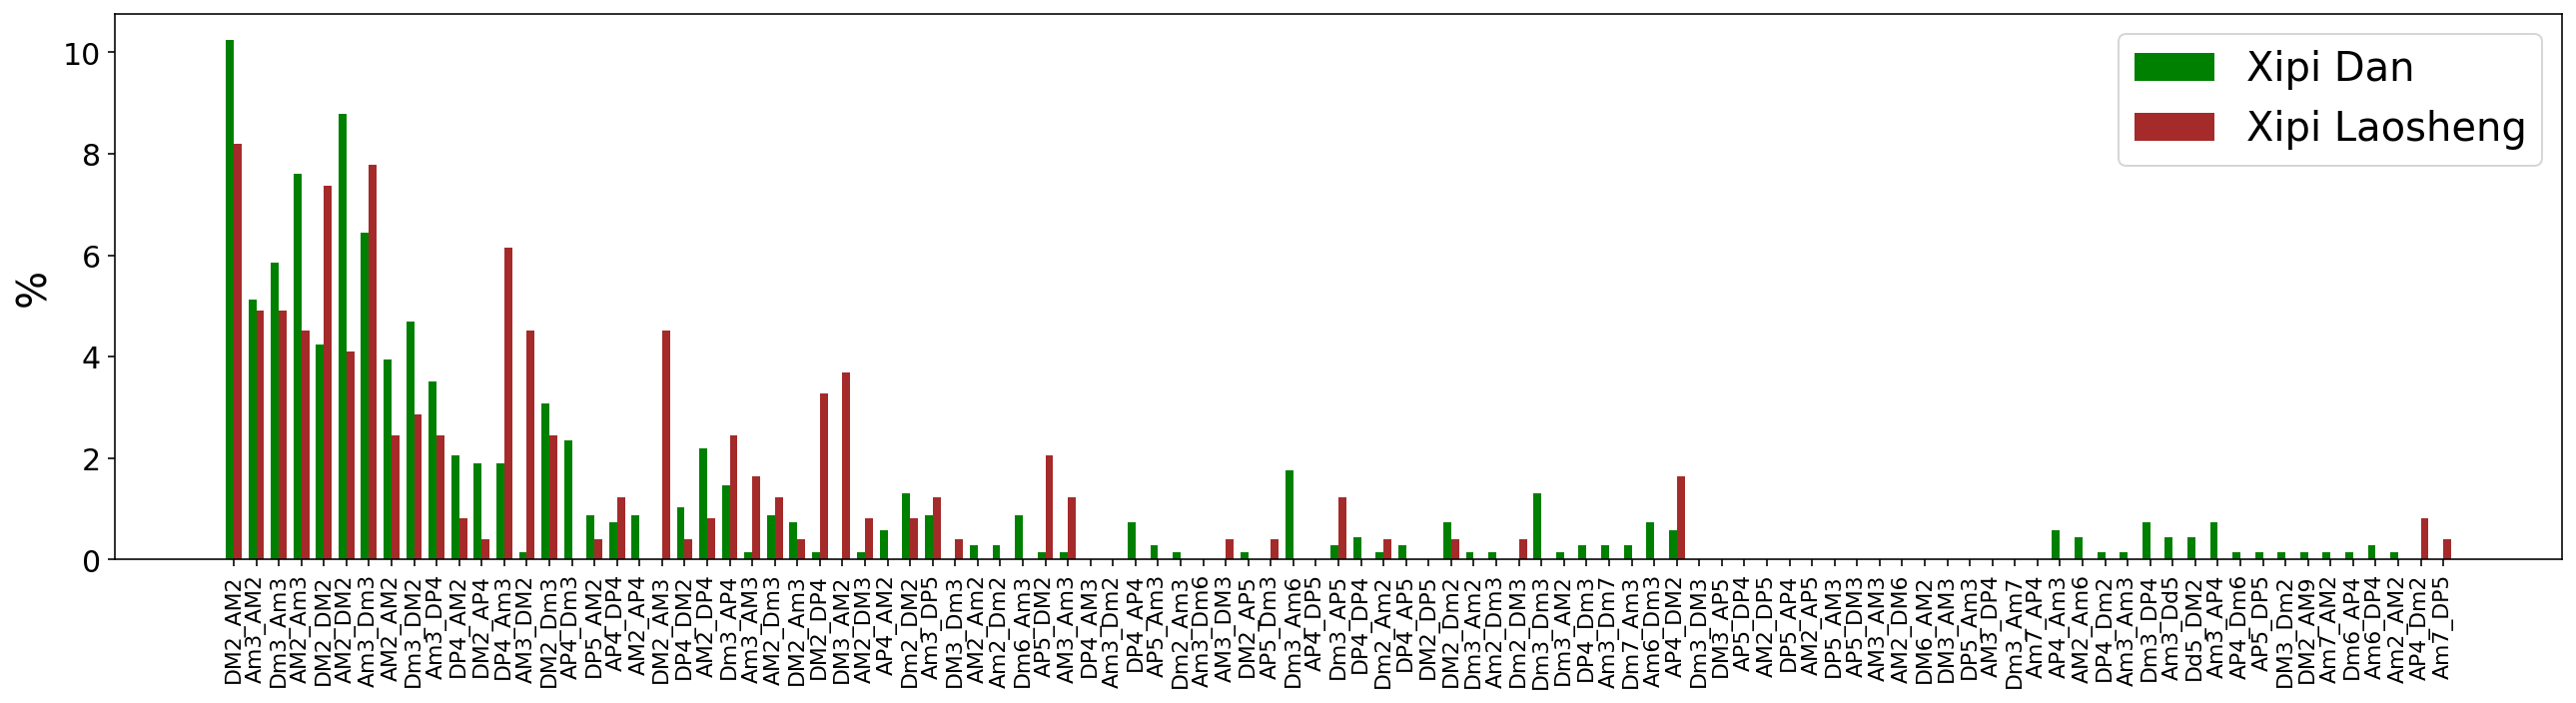

In [20]:
x = np.arange(len(xTicks_erhuang_dan))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, yValues_xipi_dan, width, label='Xipi Dan', color="green")
rects2 = ax.bar(x + width/2, yValues_xipi_laosheng, width, label='Xipi Laosheng', color="brown")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%', fontsize=20)
ax.set_title('')
ax.set_xticks(x, xTicks_xipi_dan, rotation='vertical', fontsize=11)
plt.yticks(fontsize=15)
ax.legend(fontsize=20)

fig.tight_layout()

plt.show()

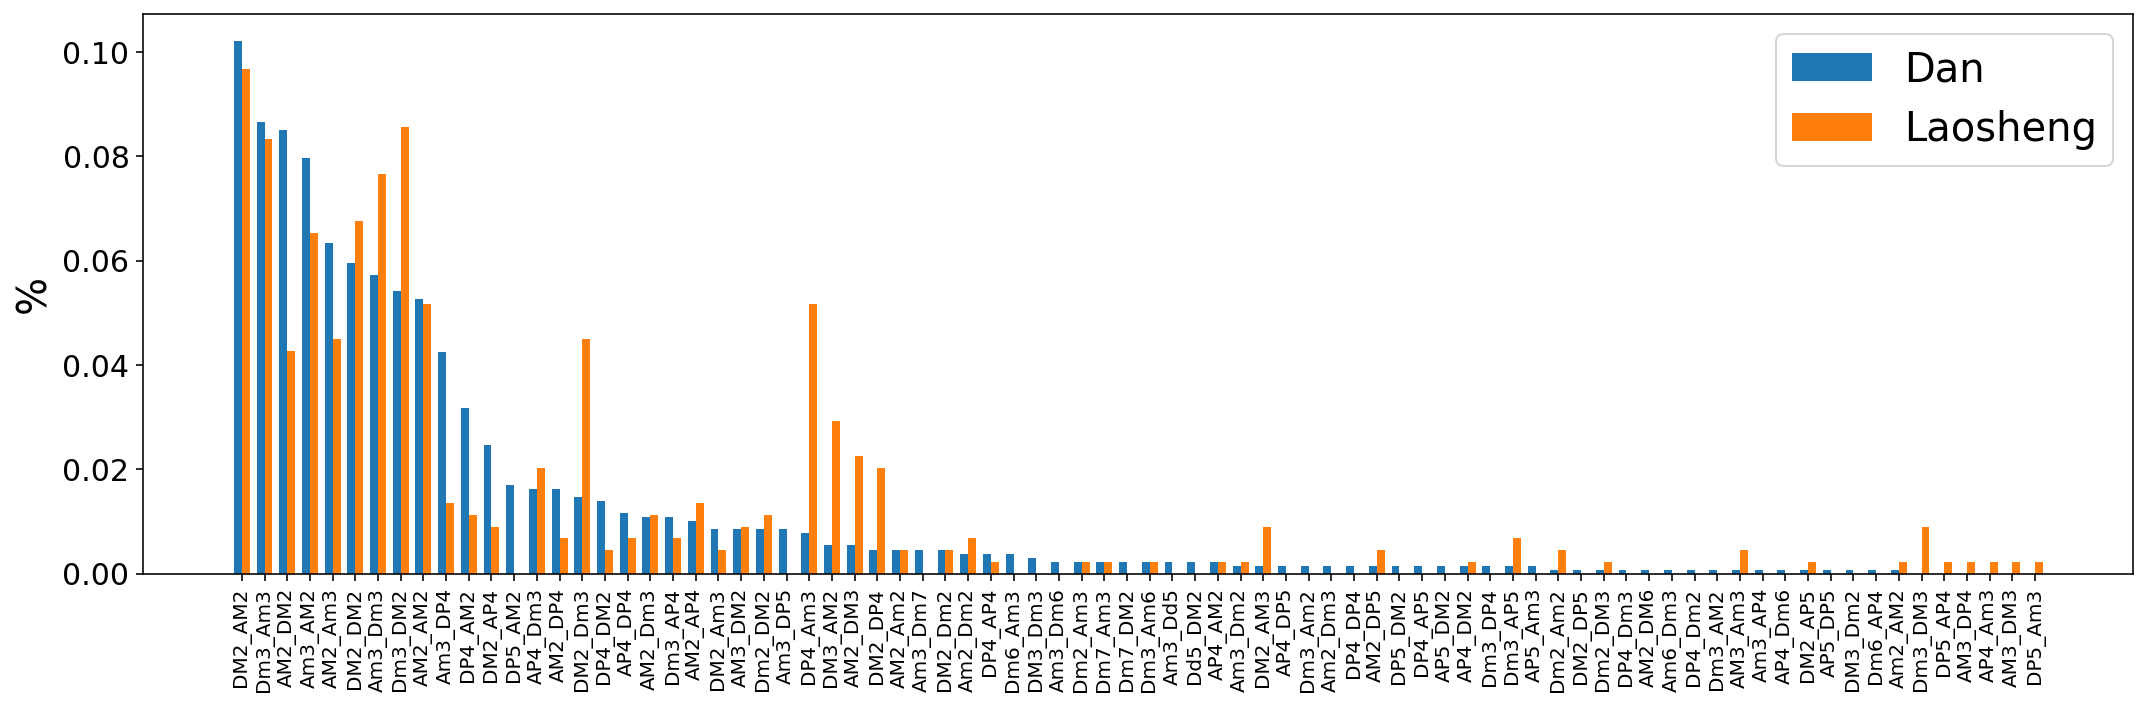

In [7]:
xTicks_sequence_dan = sorted_sequence_intervals_dan.keys()
yValues_sequence_dan = sorted_sequence_intervals_dan.values()
xTicks_sequence_laosheng = sorted_sequence_intervals_laosheng.keys()
yValues_sequence_laosheng = sorted_sequence_intervals_laosheng.values()

x = np.arange(len(xTicks_sequence_dan))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, yValues_sequence_dan, width, label='Dan')
rects2 = ax.bar(x + width/2, yValues_sequence_laosheng, width, label='Laosheng')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%', fontsize=20)
ax.set_title('')
ax.set_xticks(x, xTicks_sequence_dan, rotation='vertical', fontsize=10)
plt.yticks(fontsize=15)
ax.legend(fontsize=20)

fig.tight_layout()

plt.show()

From the plot, we can see that the most frequent sequence of three notes for the Dan role type consist in a descending major second followed by an ascending major second. The next two frequent sequence of three notes are: descending minor third followed by an ascending minor third, and an ascending major second followed by a descending major second. Therefore, we can see that the three most frequent sequences correspond to symmetric movements, which can be related to the intrinsic melismatic nature of the Dan role type. 

For the Laosheng role type, we can see that it shares some frequent sequences with Dan, like the first one, i.e. descending major second followed by ascending major 2nd. However, other sequences have more significance when compared to the Dan role type, like the descending minor third followed by major second, as well as descending major second followed by another descending minor third, desceding perfect fourth followed by ascending minor third, descending major third followed by ascending major second.